In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path

In [2]:
split_info_df = pd.read_csv(Path("resources", "subject_info_df.csv"))
split_info_df.head()


,SUBJECT_ID,ICUSTAY_ID,DBSOURCE,CAREUNIT,WARDID,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,ETHNICITY,GENDER,AGE
0,268,280836,carevue,MICU,52,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,HISPANIC OR LATINO,F,66
1,269,206613,carevue,MICU,52,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,NaN,WHITE,M,40
2,270,220345,carevue,CCU,57,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,UNKNOWN/NOT SPECIFIED,M,80
3,272,210407,carevue,CCU,57,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,WHITE,M,67
4,273,241507,carevue,MICU,52,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,BLACK/AFRICAN AMERICAN,M,34


In [26]:
def value_counts(column: str):
    return split_info_df.groupby([column], dropna=False, as_index=False).size()

def bin_counts(column: str, counts_df : pd.DataFrame, bin_size: int):
    bins = np.linspace(split_info_df[column].min(), 90, int(90 / bin_size) + 1)
    groups = counts_df.groupby(pd.cut(counts_df[column], bins))["size"]
    return groups.sum().reset_index()

def collapse_counts(column: str, counts_df: pd.DataFrame, collapse_columns: list):
    collapse_mapping = dict()
    for collapse_column in collapse_columns:
        index = counts_df[column].apply(lambda x: collapse_column in x)
        collapse_mapping[collapse_column] = counts_df[index][column].tolist()
        total_count = counts_df[index]["size"].sum()
        counts_df = counts_df[~index]
        counts_df.loc[len(counts_df)] = [collapse_column, total_count]

    return counts_df.sort_values("size", ascending=False), collapse_mapping

def other_counts(column: str, counts_df: pd.DataFrame, min_counts: int):
    others = counts_df[(counts_df["size"] <= min_counts)]
    total_count = others["size"].sum()
    counts_df = counts_df[(counts_df["size"] > min_counts)]
    if not counts_df[column].isin(["OTHER"]).any():
        counts_df.loc[len(counts_df)] = ["OTHER", total_count]
    else:
        counts_df = counts_df.set_index(column)
        counts_df.loc["OTHER", "size"] = total_count + counts_df.loc["OTHER", "size"]
        counts_df = counts_df.reset_index()
    return counts_df.sort_values("size", ascending=False), others[column].to_list()


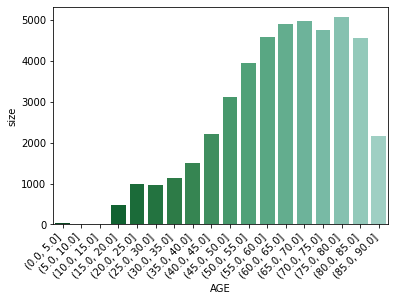

In [4]:
column = "AGE"
counts_df = value_counts(column)
counts_df = bin_counts(column, counts_df, 5)
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 10))
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [22]:
column = "ETHNICITY"
counts_df = value_counts(column)
collapse_ethnicities = ["WHITE", "BLACK", "HISPANIC", "ASIAN", "AMERICAN INDIAN"]
counts_df, collapse_mapping = collapse_counts(column, counts_df, collapse_ethnicities)
counts_df, others = other_counts(column, counts_df, 500)

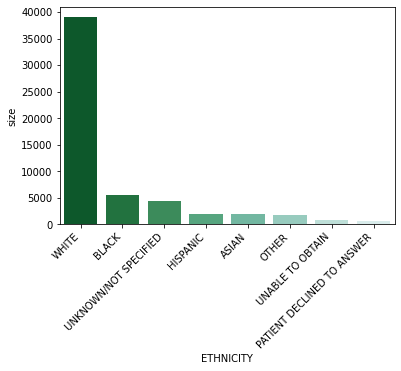

In [6]:
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 1))
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


In [7]:
dict(counts_df.to_numpy())

{'WHITE': 39030,
 'BLACK': 5498,
 'UNKNOWN/NOT SPECIFIED': 4295,
 'HISPANIC': 2025,
 'ASIAN': 1913,
 'OTHER': 1756,
 'UNABLE TO OBTAIN': 775,
 'PATIENT DECLINED TO ANSWER': 530}

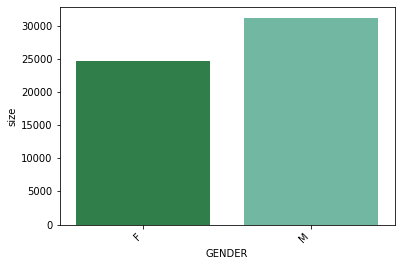

In [8]:
column = "GENDER"
counts_df = value_counts(column)
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 1))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
print()

In [18]:
column = "LANGUAGE"
counts_df = value_counts(column)
counts_df, others = other_counts(column, counts_df, 50)


/home/amadou/.local/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


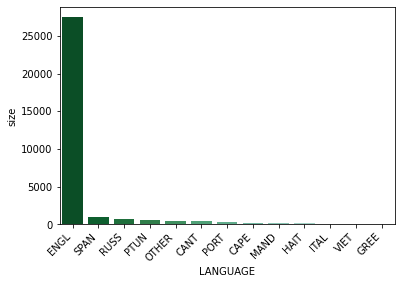

In [10]:
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 1))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
print()

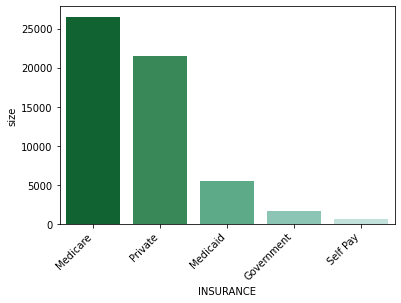

In [11]:
column = "INSURANCE"
counts_df = value_counts(column).sort_values("size", ascending=False)
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 1))
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

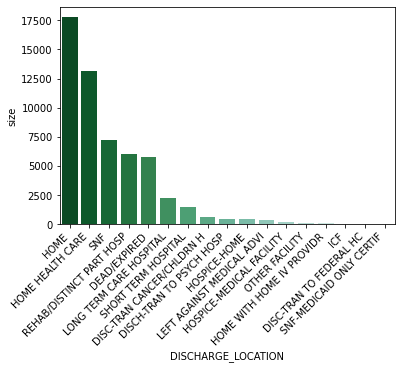

In [12]:
column = "DISCHARGE_LOCATION"
counts_df = value_counts(column).sort_values("size", ascending=False)
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 1))
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

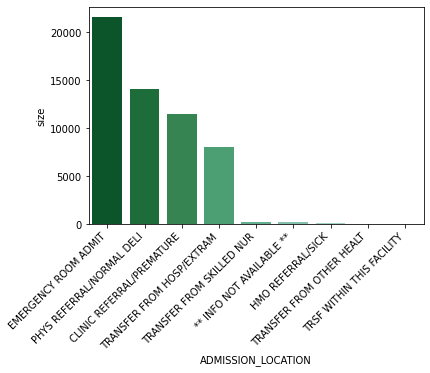

In [13]:
column = "ADMISSION_LOCATION"
counts_df = value_counts(column).sort_values("size", ascending=False)
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 1))
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

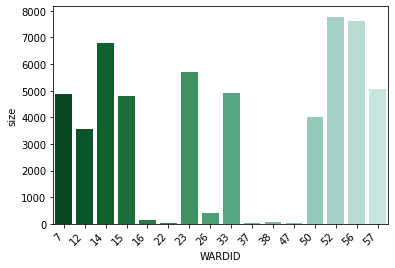

In [14]:
column = "WARDID"
counts_df = value_counts(column).sort_values("size", ascending=False)
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 5))
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

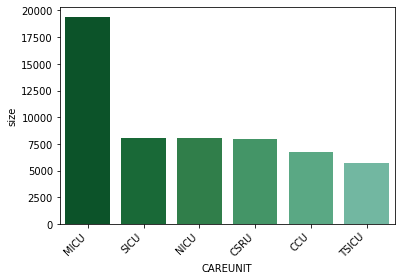

In [15]:
column = "CAREUNIT"
counts_df = value_counts(column).sort_values("size", ascending=False)
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 5))
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

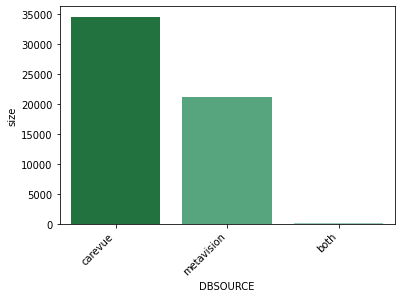

In [16]:
column = "DBSOURCE"
counts_df = value_counts(column).sort_values("size", ascending=False)
chart = sns.barplot(x=column,
                    y="size",
                    data=counts_df,
                    palette=sns.color_palette("BuGn_r", n_colors=len(counts_df) + 1))
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [23]:
class SplitHandler(object):

    def __init__(self, split_info_path):
        self._split_info_df = pd.read_csv(Path(split_info_path))
        self._count_dfs = dict()
        self._others = dict()
        self._collapse_mappings = dict()

        self._colum_settings = {
            "AGE": {
                "binning": 5
            },
            "ETHNICITY": {
                "collapse": ["WHITE", "BLACK", "HISPANIC", "ASIAN", "AMERICAN INDIAN"],
                "other": 500
            },
            "GENDER": {},
            "LANGUAGE": {
                "other": 50
            },
            "INSURANCE": {},
            "DISCHARGE_LOCATION": {},
            "ADMISSION_LOCATION": {},
            "WARDID": {},
            "CAREUNIT": {},
            "DBSOURCE": {}

        }
        self._process_attributes()

    def _value_counts(self, column: str):
        return self._split_info_df.groupby([column], dropna=False, as_index=False).size()


    def _bin_counts(self, column: str, counts_df: pd.DataFrame, bin_size: int):
        bins = np.linspace(self._split_info_df[column].min(), 90, int(90 / bin_size) + 1)
        groups = counts_df.groupby(pd.cut(counts_df[column], bins))["size"]
        return groups.sum().reset_index()


    def _collapse_counts(self, column: str, counts_df: pd.DataFrame, collapse_columns: list):
        collapse_mapping = dict()
        for collapse_column in collapse_columns:
            index = counts_df[column].apply(lambda x: collapse_column in x)
            collapse_mapping[collapse_column] = counts_df[index][column].tolist()
            total_count = counts_df[index]["size"].sum()
            counts_df = counts_df[~index]
            counts_df.loc[len(counts_df)] = [collapse_column, total_count]

        return counts_df.sort_values("size", ascending=False), collapse_mapping


    def _other_counts(self, column: str, counts_df: pd.DataFrame, min_counts: int):
        others = counts_df[(counts_df["size"] <= min_counts)]
        total_count = others["size"].sum()
        counts_df = counts_df[(counts_df["size"] > min_counts)]
        if not counts_df[column].isin(["OTHER"]).any():
            counts_df.loc[len(counts_df)] = ["OTHER", total_count]
        else:
            counts_df = counts_df.set_index(column)
            counts_df.loc["OTHER", "size"] = total_count + counts_df.loc["OTHER", "size"]
            counts_df = counts_df.reset_index()
        return counts_df.sort_values("size", ascending=False), others[column].to_list()

    def _process_attributes(self):
        for attribute, setting in self._colum_settings.items():
            counts_df = self._value_counts(attribute)
            if attribute == "ETHNICITY":
                print()
            if "binning" in setting:
                counts_df = self._bin_counts(attribute, counts_df, setting["binning"])
            if "collapse" in setting:
                counts_df, self._collapse_mappings[attribute] = self._collapse_counts(
                    attribute, counts_df, setting["collapse"])
            if "other" in setting:
                counts_df, self._others[attribute] = self._other_counts(
                    attribute, counts_df, setting["other"])
            self._count_dfs[attribute] = counts_df


In [24]:
handler = SplitHandler(Path("resources", "subject_info_df.csv"))

/home/amadou/.local/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [25]:
handler._others

{'ETHNICITY': ['MULTI RACE ETHNICITY',
  'PORTUGUESE',
  'AMERICAN INDIAN',
  'MIDDLE EASTERN',
  'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
  'CARIBBEAN ISLAND'],
 'LANGUAGE': ['* BE',
  '* FU',
  '** T',
  '**SH',
  '**TO',
  '*AMH',
  '*ARA',
  '*ARM',
  '*BEN',
  '*BOS',
  '*BUL',
  '*BUR',
  '*CAN',
  '*CDI',
  '*CHI',
  '*CRE',
  '*DEA',
  '*DUT',
  '*FAR',
  '*FIL',
  '*FUL',
  '*GUJ',
  '*HUN',
  '*IBO',
  '*KHM',
  '*LEB',
  '*LIT',
  '*MAN',
  '*MOR',
  '*NEP',
  '*PER',
  '*PHI',
  '*PUN',
  '*ROM',
  '*RUS',
  '*SPA',
  '*TAM',
  '*TEL',
  '*TOI',
  '*TOY',
  '*URD',
  '*YID',
  '*YOR',
  'ALBA',
  'AMER',
  'ARAB',
  'BENG',
  'CAMB',
  'ETHI',
  'FREN',
  'HIND',
  'JAPA',
  'KORE',
  'LAOT',
  'PERS',
  'POLI',
  'SERB',
  'SOMA',
  'TAGA',
  'THAI',
  'TURK',
  'URDU']}